In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
csv_path = "D:/Python/dsci/indonesiagrdp.csv"

with open(csv_path, "r") as file:
    data = csv.reader(file)
    print([line for line in data])


[['Provinsi', '2019', '2020', '2021', '2022', '2023'], ['Aceh', '132070', '131581', '135274', '140972', '146932'], ['Sumatera Utara', '539514', '533746', '547652', '573529', '602236'], ['Sumatera Barat', '172006', '168326', '172691', '182629', '191071'], ['Riau', '495607', '489996', '506472', '529533', '551282'], ['Jambi', '349111', '343851', '351851', '361130', '369649'], ['Sumatera Selatan', '315465', '315129', '326405', '343460', '360911'], ['Bengkulu', '46345', '46338', '47854', '49916', '52041'], ['Lampung', '244378', '237662', '246966', '257354', '269241'], ['Kepulauan Bangka Belitung', '53942', '52706', '53700', '57805', '60038'], ['Kepulauan Riau', '338587', '174959', '180952', '196282', '200044'], ['DKI Jakarta', '1836241', '1792291', '1856001', '1953489', '2050466'], ['Jawa Barat', '1490960', '1534381', '1507741', '1589985', '1669147'], ['Jawa Tengah', '991517', '965227', '997321', '1021302', '1102563'], ['DI Yogyakarta', '386899', '393071', '407773', '417120', '418177'], ['J

In [27]:
dataa = pd.read_csv(csv_path)
df = pd.DataFrame(dataa)
print(df)

                     Provinsi       2019       2020       2021       2022  \
0                        Aceh   132070.0   131581.0   135274.0   140972.0   
1              Sumatera Utara   539514.0   533746.0   547652.0   573529.0   
2              Sumatera Barat   172006.0   168326.0   172691.0   182629.0   
3                        Riau   495607.0   489996.0   506472.0   529533.0   
4                       Jambi   349111.0   343851.0   351851.0   361130.0   
5            Sumatera Selatan   315465.0   315129.0   326405.0   343460.0   
6                    Bengkulu    46345.0    46338.0    47854.0    49916.0   
7                     Lampung   244378.0   237662.0   246966.0   257354.0   
8   Kepulauan Bangka Belitung    53942.0    52706.0    53700.0    57805.0   
9              Kepulauan Riau   338587.0   174959.0   180952.0   196282.0   
10                DKI Jakarta  1836241.0  1792291.0  1856001.0  1953489.0   
11                 Jawa Barat  1490960.0  1534381.0  1507741.0  1589985.0   

<function matplotlib.pyplot.show(close=None, block=None)>

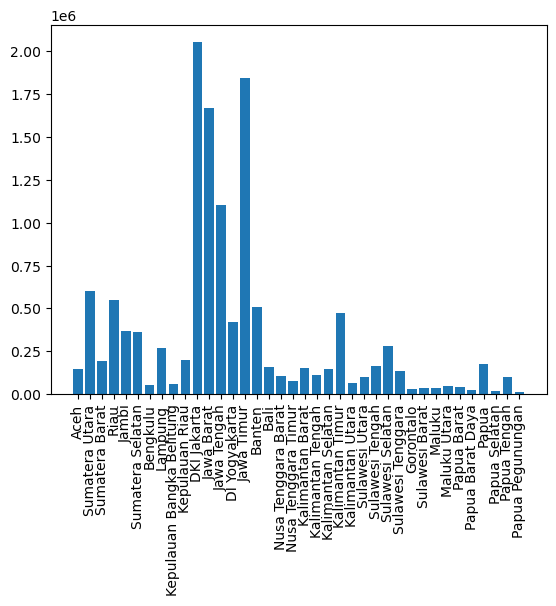

In [40]:
plt.bar(df["Provinsi"], df["2023"])
plt.xticks(rotation=90)
plt.show

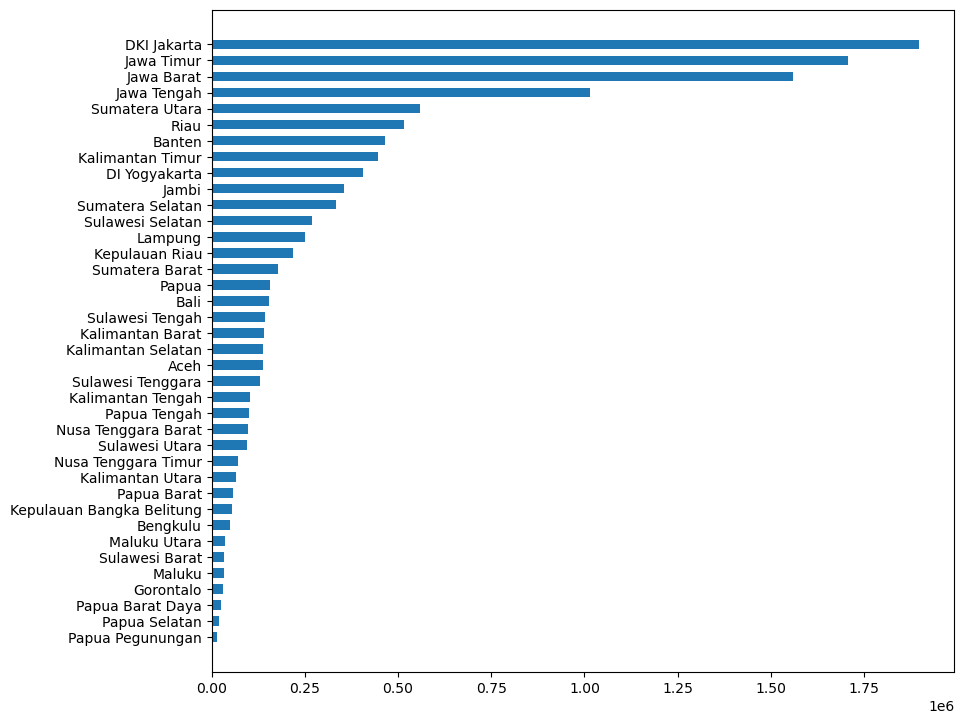

In [93]:
figure_height = len(sortir['Average_GRDP']) * 0.2
plt.figure(figsize=(10, figure_height))
plt.barh(sortir['Provinsi'], sortir['Average_GRDP'], height=0.6)
plt.tight_layout(pad=2.0)
plt.show()

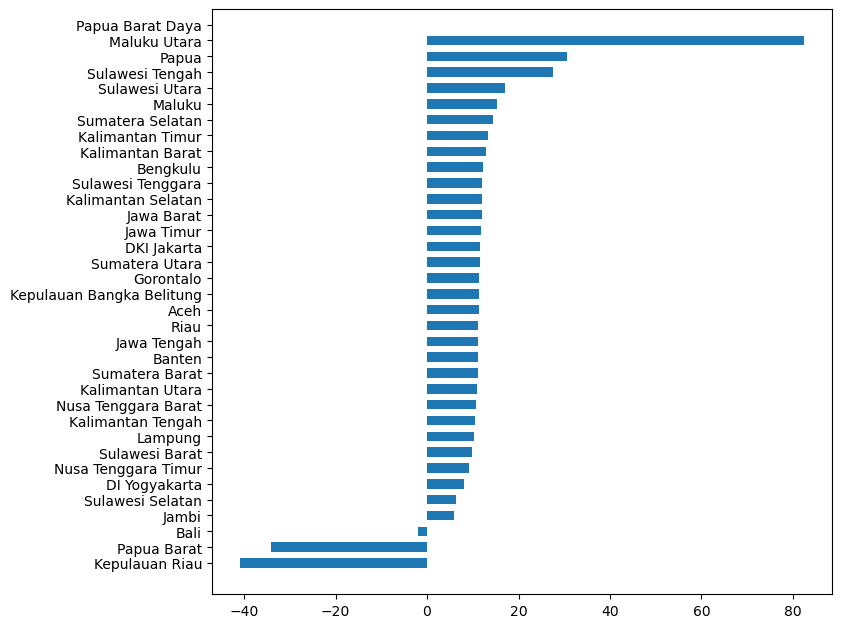

In [104]:
df['GRDP_Growth'] = ((df['2023'] - df['2019']) / df['2019']) * 100
growth_sorted = df.sort_values(by='GRDP_Growth')
plt.figure(figsize=(8, figure_height))
plt.barh(growth_sorted['Provinsi'], growth_sorted['GRDP_Growth'], height= 0.6)
# plt.tight_layout(pad=2.0)
plt.show()


In [108]:
import json
import folium
geojsondir = "D:/Python/dsci/id-all.geo.json"
with open(geojsondir, "r") as jsonf:
    geojson = json.load(jsonf)

m = folium.Map(location=[-2.5, 118.0], zoom_start=5)
folium.Choropleth(
    geo_data= geojson,
    name='GRDP Choropleth',
    data=df,
    columns=['Provinsi', 'Average_GRDP'],
    key_on='feature.properties.name', # This links GeoJSON 'name' property to 'Provinsi' column
    fill_color='YlGnBu', # Color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average GRDP',
    highlight=True, # Highlight regions on hover
    tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['Provinsi']), # Tooltip on hover

).add_to(m)

folium.LayerControl().add_to(m)

m

ValueError: key_on `'properties.name'` not found in GeoJSON.